# Poblacion Ciudad Autónoma de Buenos Aires

Analizaremos la poblacion en C.A.B.A.,su distribución y evolución para poder comprender mejor la problematica de espacios verdes que posee la misma. Esta información es sumamente revelante para poder responder nuestros objetivos.

## Importamos las librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importamos el dataset


El dataset lo obtuvimos de la página del Gobierno de la Ciudad.

Contiene la cantidad de habitantes en CABA desde 2015 a 2020. Como asi tambien la estimacion poblacional hasta el año 2025.

In [2]:
pwd

'C:\\Users\\Tom\\Desktop'

In [3]:
poblacion = pd.read_excel(r'C:\Users\Tom\Desktop\PythonUTN\Estimacion_Poblacion_nuevo.xlsx', delimiter=',', parse_dates = True)

Una vez cargado el dataset, observamos la cantidad de filas y columnas

In [4]:
np.shape(poblacion)

(396, 19)

Visualizamos los primeros renglones del dataset de población

In [5]:
poblacion.head()

,Grupo de edad (años),Total,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,SEXO,AÑO
0,Total,1426582,123030,66915,90417,113113,85451,83865,112134,106508,81816,79581,89555,99162,107341,102439,85255,Hombre,2015
1,0-4,108023,8902,3819,6405,10301,5797,5806,9568,11768,6465,5743,6041,7305,7635,6518,5950,Hombre,2015
2,5-9,105680,7939,3568,6198,10183,5868,5545,9274,11335,6865,6192,6603,7002,6956,5957,6195,Hombre,2015
3,10-14,99209,7592,3347,5858,10054,5384,4955,8764,10616,6658,5488,6390,6402,6446,5523,5732,Hombre,2015
4,15-19,94542,7654,4005,5626,8996,5262,4770,8086,9369,5845,5426,5779,6079,6237,5819,5589,Hombre,2015



Exploro las columnas de mi dataframe 

In [6]:
poblacion.columns

Index(['Grupo de edad (años)',                'Total',                      1,
                            2,                      3,                      4,
                            5,                      6,                      7,
                            8,                      9,                     10,
                           11,                     12,                     13,
                           14,                     15,                 'SEXO',
                        'AÑO'],
      dtype='object')

## Analizamos si existen NaNs

In [7]:
col_nulls = poblacion.isnull().any()
col_nulls

Grupo de edad (años)    False
Total                   False
1                       False
2                       False
3                       False
4                       False
5                       False
6                       False
7                       False
8                       False
9                       False
10                      False
11                      False
12                      False
13                      False
14                      False
15                      False
SEXO                    False
AÑO                     False
dtype: bool

## Modificamos las nombres de las columnas 

Para poder visualizar mejor los resultados la identificacion de comuna solamente con su numero no es conviente. Debido a esto procedemos a modificar los enncabezados.
Modificamos la columna del rango de edad para que sea mas cómodo su uso.

In [8]:
poblacion.rename(columns={'Grupo de edad (años)':'Rango Etario',1:'Comuna 1',2:'Comuna 2',3:'Comuna 3',4:'Comuna 4',5:'Comuna 5',6:'Comuna 6',7:'Comuna 7',8:'Comuna 8',9:'Comuna 9',10:'Comuna 10',11:'Comuna 11',12:'Comuna 12',13:'Comuna 13',14:'Comuna 14',15:'Comuna 15',},inplace=True) 

In [9]:
poblacion.columns

Index(['Rango Etario', 'Total', 'Comuna 1', 'Comuna 2', 'Comuna 3', 'Comuna 4',
       'Comuna 5', 'Comuna 6', 'Comuna 7', 'Comuna 8', 'Comuna 9', 'Comuna 10',
       'Comuna 11', 'Comuna 12', 'Comuna 13', 'Comuna 14', 'Comuna 15', 'SEXO',
       'AÑO'],
      dtype='object')

Observamos como queda nuestro dataset con los cambios efectuados

In [10]:
poblacion.head()

,Rango Etario,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,SEXO,AÑO
0,Total,1426582,123030,66915,90417,113113,85451,83865,112134,106508,81816,79581,89555,99162,107341,102439,85255,Hombre,2015
1,0-4,108023,8902,3819,6405,10301,5797,5806,9568,11768,6465,5743,6041,7305,7635,6518,5950,Hombre,2015
2,5-9,105680,7939,3568,6198,10183,5868,5545,9274,11335,6865,6192,6603,7002,6956,5957,6195,Hombre,2015
3,10-14,99209,7592,3347,5858,10054,5384,4955,8764,10616,6658,5488,6390,6402,6446,5523,5732,Hombre,2015
4,15-19,94542,7654,4005,5626,8996,5262,4770,8086,9369,5845,5426,5779,6079,6237,5819,5589,Hombre,2015


In [11]:
poblacion.set_index('Rango Etario')

,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,SEXO,AÑO
Rango Etario,,,,,,,,,,,,,,,,,,
Total,1426582,123030,66915,90417,113113,85451,83865,112134,106508,81816,79581,89555,99162,107341,102439,85255,Hombre,2015
0-4,108023,8902,3819,6405,10301,5797,5806,9568,11768,6465,5743,6041,7305,7635,6518,5950,Hombre,2015
5-9,105680,7939,3568,6198,10183,5868,5545,9274,11335,6865,6192,6603,7002,6956,5957,6195,Hombre,2015
10-14,99209,7592,3347,5858,10054,5384,4955,8764,10616,6658,5488,6390,6402,6446,5523,5732,Hombre,2015
15-19,94542,7654,4005,5626,8996,5262,4770,8086,9369,5845,5426,5779,6079,6237,5819,5589,Hombre,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60-64,82705,6125,4835,5256,5284,5440,5634,6075,4342,4260,4628,5395,6090,7360,6963,5018,Mujer,2025
65-69,81838,5958,4906,5217,5255,5418,5461,5927,4216,4427,4591,5274,5951,7414,6978,4845,Mujer,2025
70-74,74659,5178,4499,4716,4708,4879,5095,5508,3898,4135,4414,4951,5529,6431,6255,4463,Mujer,2025


## Eliminamos los subtotales

El dataset contiene todos los subtotales de cada año de la poblacion en la Ciudad.
A la hora de analizar diferentes analisis y conclusiones esas filas pueden dar a discusion y obtener estos valores se puede realizar en codigo, por lo tanto optamos por eliminarlas.

In [12]:
index_pobl=poblacion[poblacion ['Rango Etario'] == 'Total'].index

In [13]:
poblacion.drop(index_pobl , inplace=True)

In [14]:
poblacion.head()

,Rango Etario,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,SEXO,AÑO
1,0-4,108023,8902,3819,6405,10301,5797,5806,9568,11768,6465,5743,6041,7305,7635,6518,5950,Hombre,2015
2,5-9,105680,7939,3568,6198,10183,5868,5545,9274,11335,6865,6192,6603,7002,6956,5957,6195,Hombre,2015
3,10-14,99209,7592,3347,5858,10054,5384,4955,8764,10616,6658,5488,6390,6402,6446,5523,5732,Hombre,2015
4,15-19,94542,7654,4005,5626,8996,5262,4770,8086,9369,5845,5426,5779,6079,6237,5819,5589,Hombre,2015
5,20-24,101659,10469,6368,7184,8367,5870,5090,7990,8476,5317,5054,5492,5966,6584,7763,5669,Hombre,2015


Observamos los valores máximos para ver si tienen sentido con la informacion poblacional de la Ciudad 

In [15]:
np.max(poblacion)

Rango Etario    80 y más
Total             122194
Comuna 1           11934
Comuna 2            7759
Comuna 3            8257
Comuna 4           10472
Comuna 5            8108
Comuna 6            7912
Comuna 7            9568
Comuna 8           11780
Comuna 9            6903
Comuna 10           6580
Comuna 11           7634
Comuna 12           9171
Comuna 13          10194
Comuna 14          10519
Comuna 15           7671
SEXO               Mujer
AÑO                 2025
dtype: object

## Evolución de habitantes en la Ciudad Autónoma de Buenos Aires

Observamos como vario la población a lo largo de los años como asi tambien la estimación propia del Gobierno de la Ciudad.

In [16]:
pobl_año= poblacion.groupby("AÑO").sum()
pobl_año

,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15
AÑO,,,,,,,,,,,,,,,,
2015,3054267,250770,149985,192375,237769,186512,184363,239597,224770,170087,170037,189925,213218,235666,226821,182372
2016,3059122,252053,149848,192573,238303,186740,184611,240116,225737,170353,170163,189956,213576,235819,226884,182390
2017,3063728,253271,149720,192763,238809,186956,184846,240607,226649,170605,170282,189986,213914,235967,226944,182409
2018,3068043,254408,149607,192945,239279,187159,185067,241065,227495,170842,170394,190016,214229,236107,227003,182427
2019,3072029,255457,149510,193115,239712,187348,185271,241484,228266,171062,170497,190046,214518,236238,227060,182445
2020,3075646,256405,149430,193276,240100,187518,185456,241861,228953,171264,170592,190076,214777,236358,227115,182465
2021,3078836,257235,149371,193425,240437,187670,185620,242188,229541,171444,170677,190105,215002,236468,227168,182485
2022,3081550,257934,149337,193560,240716,187800,185760,242460,230018,171600,170750,190135,215189,236566,227219,182506
2023,3083770,258497,149328,193682,240937,187907,185875,242674,230380,171733,170811,190165,215335,236650,227268,182528


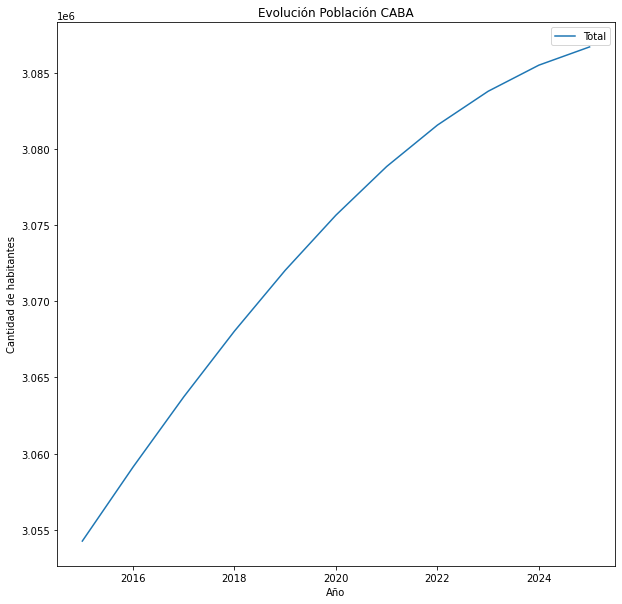

In [17]:
plt.figure(figsize=(10,10))
plt.plot(pobl_año.index, pobl_año['Total'], label='Total');

plt.legend(loc='upper right')
plt.title('Evolución Población CABA')
plt.ylabel('Cantidad de habitantes')
plt.xlabel('Año')
plt.show()

## Filtro mi dataset con la información del año 2020

La informacion del año 2020 será de gran utilidad para analizar la situación actual de la Ciudad.

In [18]:
pobl_2020 = poblacion.loc[poblacion.AÑO == 2020]

In [19]:
pobl_2020.head(10)

,Rango Etario,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,SEXO,AÑO
181,0-4,105015,8886,3660,6213,10058,5612,5614,9325,11680,6266,5523,5784,7073,7343,6271,5707,Hombre,2020
182,5-9,103973,8022,3462,6087,10066,5751,5428,9150,11389,6736,6028,6400,6863,6773,5803,6015,Hombre,2020
183,10-14,102081,8023,3396,6016,10394,5518,5073,9043,11153,6831,5587,6476,6562,6564,5625,5820,Hombre,2020
184,15-19,97651,8121,4079,5802,9338,5415,4902,8377,9885,6022,5546,5881,6257,6376,5952,5698,Hombre,2020
185,20-24,96245,10182,5946,6790,7960,5537,4795,7587,8197,5020,4735,5123,5628,6170,7277,5298,Hombre,2020
186,25-29,104083,11163,6041,7434,7926,6544,5755,7724,7777,5078,4998,5664,6520,7204,8277,5978,Hombre,2020
187,30-34,113301,11068,5259,7774,8258,7361,6953,8220,7548,5728,5691,6537,8300,8675,8819,7110,Hombre,2020
188,35-39,111570,10202,4586,7272,8392,6945,7030,8472,7557,6135,5943,6891,8245,8943,8144,6813,Hombre,2020
189,40-44,108302,9710,4287,7130,8564,6714,6527,8163,7530,6303,5874,6868,7706,8435,7932,6559,Hombre,2020
190,45-49,96849,8594,4087,6182,7103,5936,6002,7323,6189,5466,5689,6498,7148,7586,6931,6115,Hombre,2020


In [20]:
pobl_2020.set_index('Rango Etario')

,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,SEXO,AÑO
Rango Etario,,,,,,,,,,,,,,,,,,
0-4,105015,8886,3660,6213,10058,5612,5614,9325,11680,6266,5523,5784,7073,7343,6271,5707,Hombre,2020
5-9,103973,8022,3462,6087,10066,5751,5428,9150,11389,6736,6028,6400,6863,6773,5803,6015,Hombre,2020
10-14,102081,8023,3396,6016,10394,5518,5073,9043,11153,6831,5587,6476,6562,6564,5625,5820,Hombre,2020
15-19,97651,8121,4079,5802,9338,5415,4902,8377,9885,6022,5546,5881,6257,6376,5952,5698,Hombre,2020
20-24,96245,10182,5946,6790,7960,5537,4795,7587,8197,5020,4735,5123,5628,6170,7277,5298,Hombre,2020
25-29,104083,11163,6041,7434,7926,6544,5755,7724,7777,5078,4998,5664,6520,7204,8277,5978,Hombre,2020
30-34,113301,11068,5259,7774,8258,7361,6953,8220,7548,5728,5691,6537,8300,8675,8819,7110,Hombre,2020
35-39,111570,10202,4586,7272,8392,6945,7030,8472,7557,6135,5943,6891,8245,8943,8144,6813,Hombre,2020
40-44,108302,9710,4287,7130,8564,6714,6527,8163,7530,6303,5874,6868,7706,8435,7932,6559,Hombre,2020


Observamos la cantidad total de habitantes en la Ciudad

In [21]:
pobl_2020['Total'].sum()

3075646

Separamos la informacion por sexo y graficamos para cada comuna la proporcion de hombres y mujeres para poder entender mejor como se divide la población en cada comuna

In [22]:
pobl_2020_sexo= pobl_2020.groupby("SEXO").sum()
pobl_2020_sexo

,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,AÑO
SEXO,,,,,,,,,,,,,,,,,
Hombre,1444545,127651,66707,91310,114957,86312,84790,113923,109653,82856,80065,89756,100392,107991,102784,85398,34340
Mujer,1631101,128754,82723,101966,125143,101206,100666,127938,119300,88408,90527,100320,114385,128367,124331,97067,34340


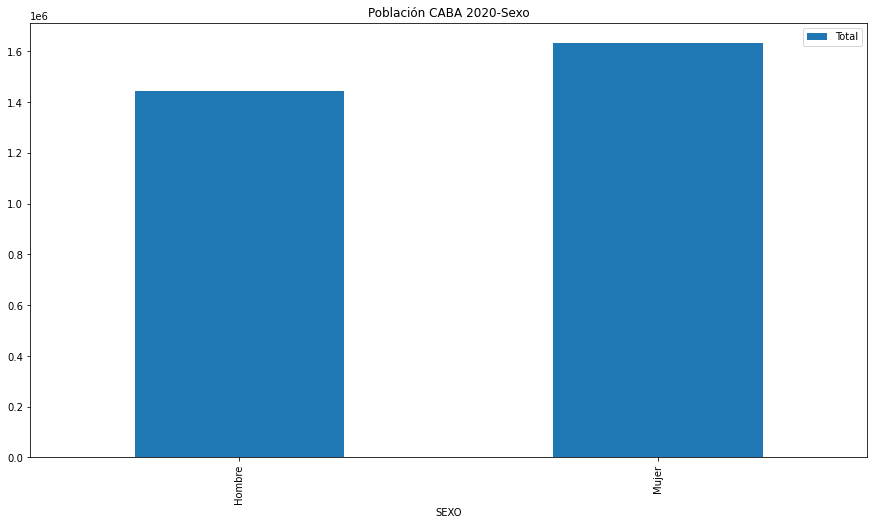

In [23]:
pobl_2020_sexo.plot(kind = "bar",y="Total", figsize = (15,8), title ="Población CABA 2020-Sexo")


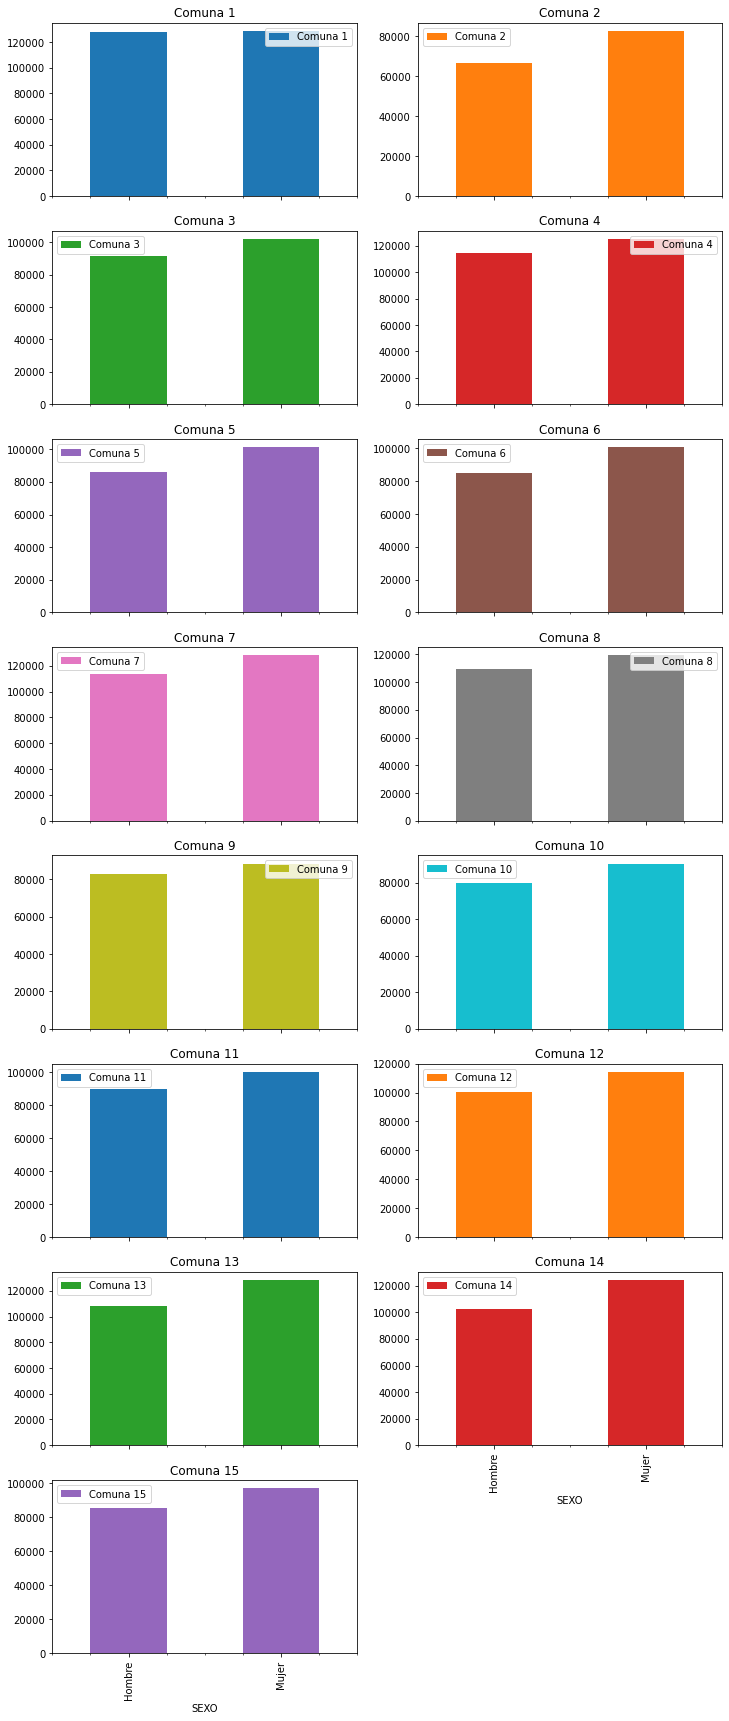

In [24]:
pobl_2020_sexo.plot(kind='bar', y=['Comuna 1', 'Comuna 2', 'Comuna 3', 'Comuna 4',
       'Comuna 5', 'Comuna 6', 'Comuna 7', 'Comuna 8', 'Comuna 9', 'Comuna 10',
       'Comuna 11', 'Comuna 12', 'Comuna 13', 'Comuna 14', 'Comuna 15'], subplots=True, layout=(8,2), figsize=(12,30))
plt.show()

Luego observamos la distribucion de la población de la Ciudad según su rango de edad y comuna

In [25]:
pobl_2020_edad= pobl_2020.groupby("Rango Etario").sum()
pobl_2020_edad.sort_values('Rango Etario')
pobl_2020_edad

,Total,Comuna 1,Comuna 2,Comuna 3,Comuna 4,Comuna 5,Comuna 6,Comuna 7,Comuna 8,Comuna 9,Comuna 10,Comuna 11,Comuna 12,Comuna 13,Comuna 14,Comuna 15,AÑO
Rango Etario,,,,,,,,,,,,,,,,,
0-4,204007,16861,6938,11801,19461,10883,11024,17965,23067,12133,10834,11311,13906,14133,12450,11240,4040
10-14,198935,15385,6572,11521,20264,10770,9941,17734,22084,12907,11316,12333,12846,12645,11106,11511,4040
15-19,192179,15614,8549,11364,18444,10591,9690,16386,19853,11722,10741,11448,12158,12388,12251,10980,4040
20-24,193088,19455,13077,13598,15686,11095,9744,15162,16573,9696,9447,9870,11056,12621,15511,10497,4040
25-29,211953,21637,12987,14838,15905,13476,12029,15599,15492,10035,10036,11166,13443,15402,17706,12202,4040
30-34,232275,20932,11183,15342,17158,15252,14649,17019,15504,11373,11632,13255,17225,18588,18593,14570,4040
35-39,229085,19717,9614,14775,17131,14626,14743,17158,15608,12253,12202,14018,17082,18905,17248,14005,4040
40-44,223548,18866,9301,14358,17360,13957,13790,17064,15517,12587,12301,14318,15891,17774,16761,13703,4040
45-49,203306,16904,9027,12935,14981,12617,12793,15517,13054,11270,11931,13435,14902,16077,14951,12912,4040


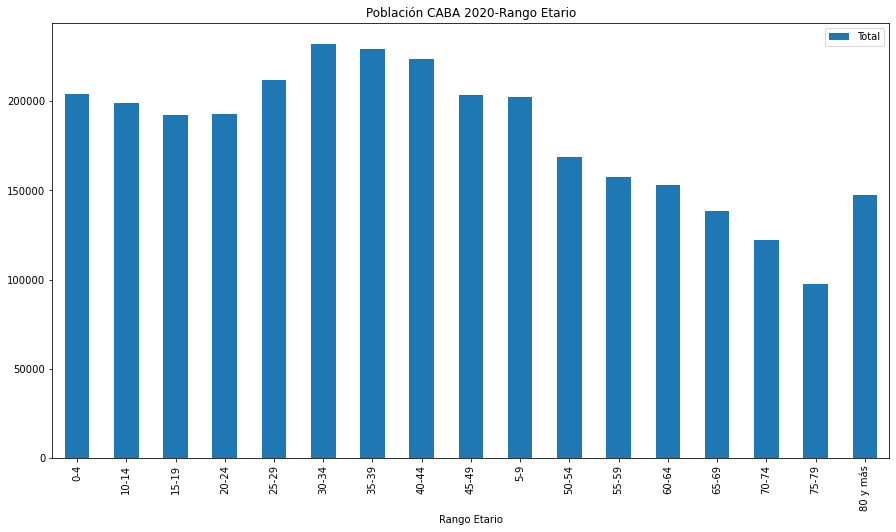

In [26]:
pobl_2020_edad.plot(kind = "bar",y="Total", figsize = (15,8), title ="Población CABA 2020-Rango Etario")

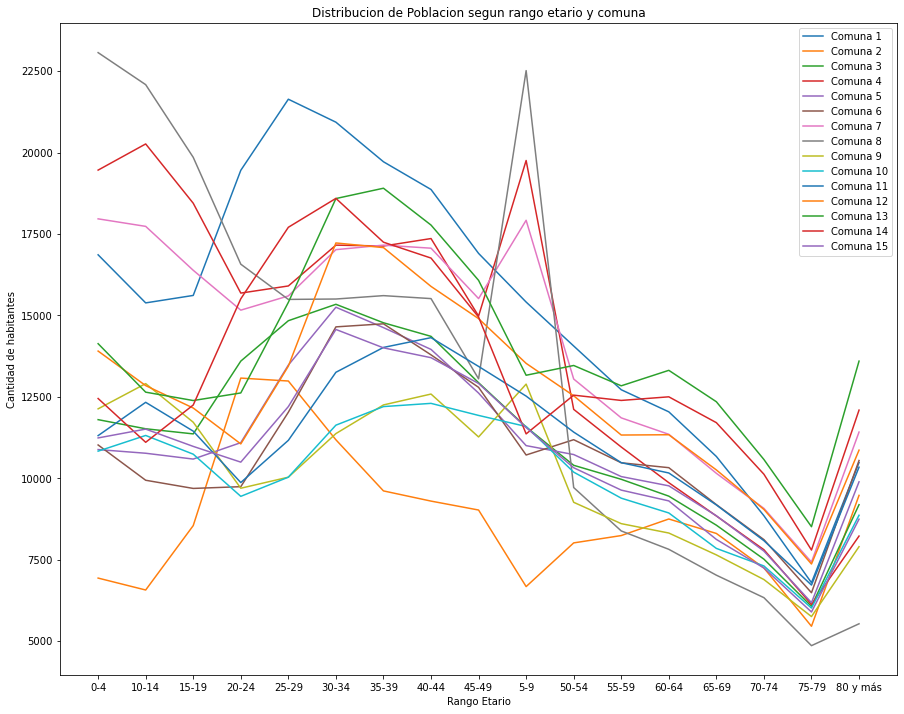

In [27]:
plt.figure(figsize=(15,12))
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 1'], label='Comuna 1');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 2'], label='Comuna 2');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 3'], label='Comuna 3');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 4'], label='Comuna 4');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 5'], label='Comuna 5');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 6'], label='Comuna 6');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 7'], label='Comuna 7');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 8'], label='Comuna 8');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 9'], label='Comuna 9');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 10'], label='Comuna 10');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 11'], label='Comuna 11');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 12'], label='Comuna 12');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 13'], label='Comuna 13');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 14'], label='Comuna 14');
plt.plot(pobl_2020_edad.index, pobl_2020_edad['Comuna 15'], label='Comuna 15');

plt.legend(loc='upper right')
plt.title('Distribucion de Poblacion segun rango etario y comuna')
plt.ylabel('Cantidad de habitantes')
plt.xlabel('Rango Etario')
plt.show()